In [1]:
import pandas as pd

# Загрузка и предобработка данных
Загружаем встроенный набор данных: ирисы Р. Фишера (1936).

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

Посмотрим, как устроен объект iris_dataset.

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [6]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
type(iris_dataset['data'])

numpy.ndarray

In [8]:
print(iris_dataset['data'].shape)
print(iris_dataset['target'].shape)

(150, 4)
(150,)


In [9]:
iris_dataset['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [10]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Разбиваем данные на обучающую и тестовую выборки.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                    test_size=0.25, random_state=0)

Визуализируем признаки попарно.

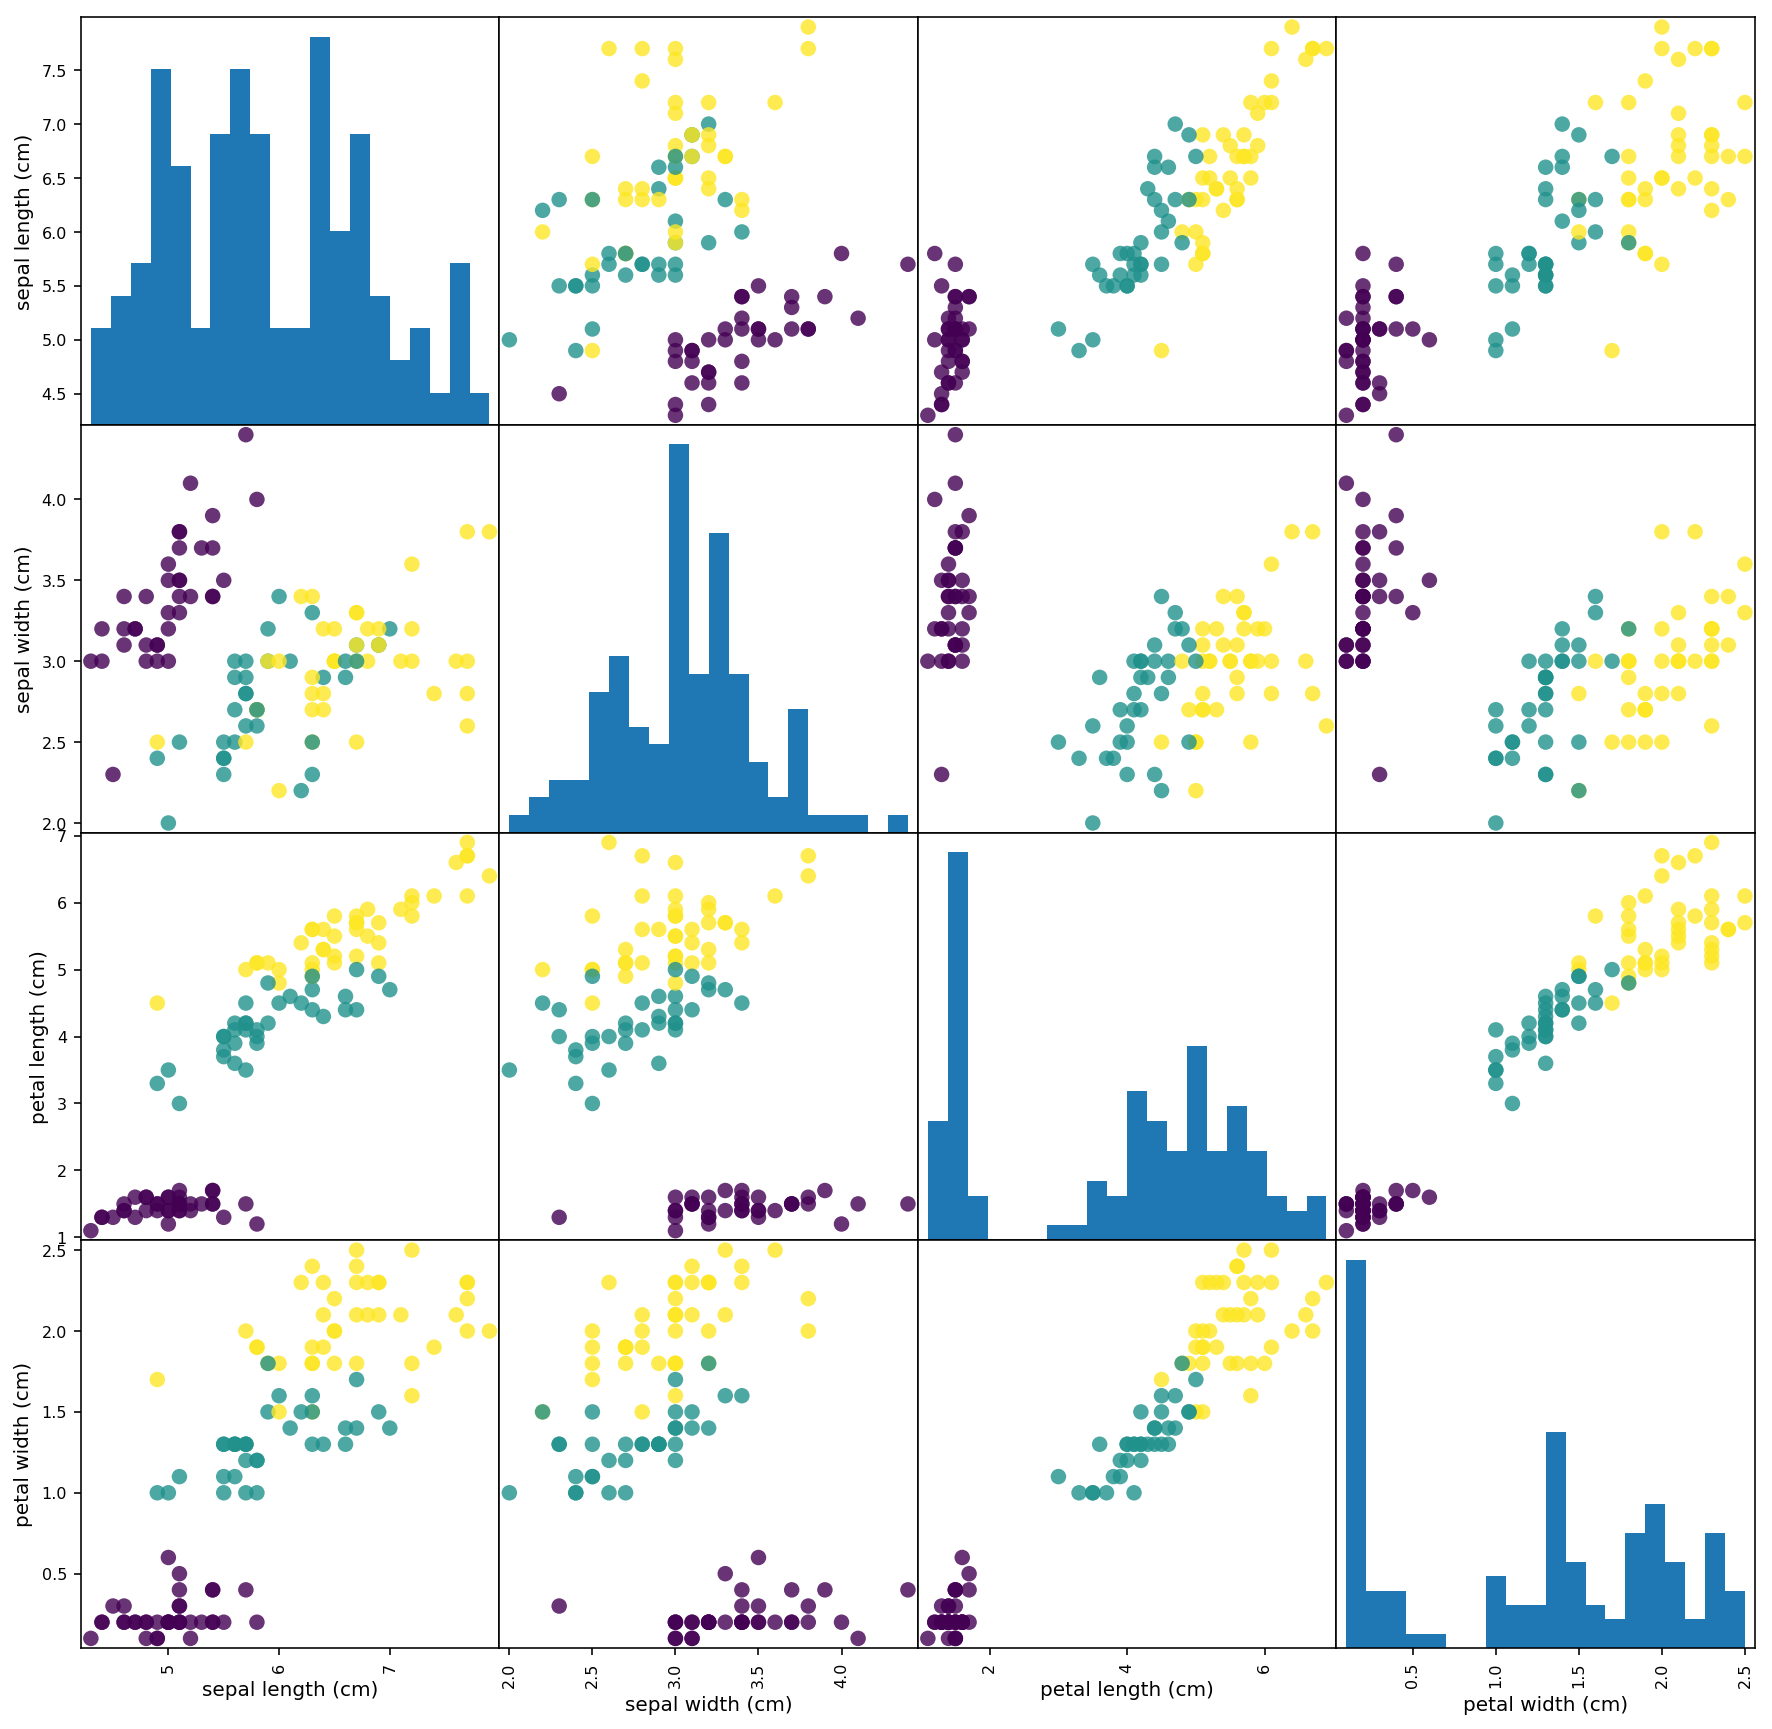

In [12]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, 
                        c=y_train, 
                        figsize=(15, 15), 
                        marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

Альтернативный вариант визуализации.

In [22]:
%matplotlib inline
import seaborn as sns; sns.set()
iris = sns.load_dataset('iris')
# iris.head()
sns.pairplot(iris, hue='species', height=1.5);

# Обучение классификатора

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

Посмотрим значение меры качества (два способа).

In [16]:
knn.score(X_test, y_test)

0.97368421052631582

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.97368421052631582

# Кросс-валидация

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, iris_dataset['data'], iris_dataset['target'], 
                         cv=kf, scoring='accuracy')
mean_score = scores.mean()
print(mean_score)

0.973333333333
